# task 1

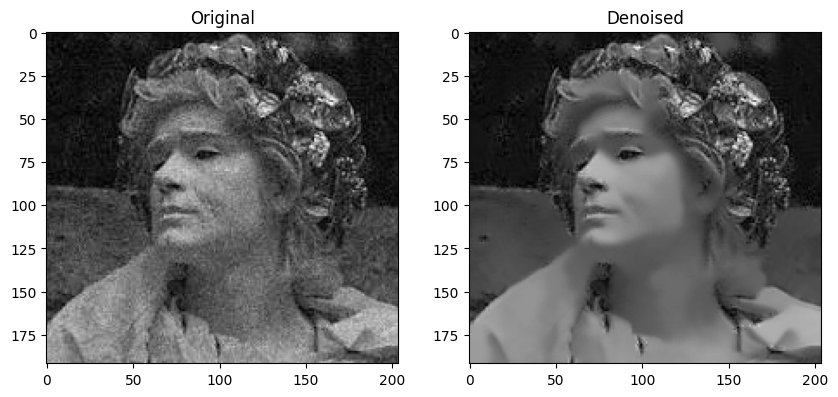

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load noisy image
image = cv2.imread('/content/download (4).jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Denoise image
denoised = cv2.fastNlMeansDenoisingColored(cv2.cvtColor(image, cv2.COLOR_RGB2BGR), None, 10, 10, 7, 21)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)), plt.title("Denoised")
plt.show()


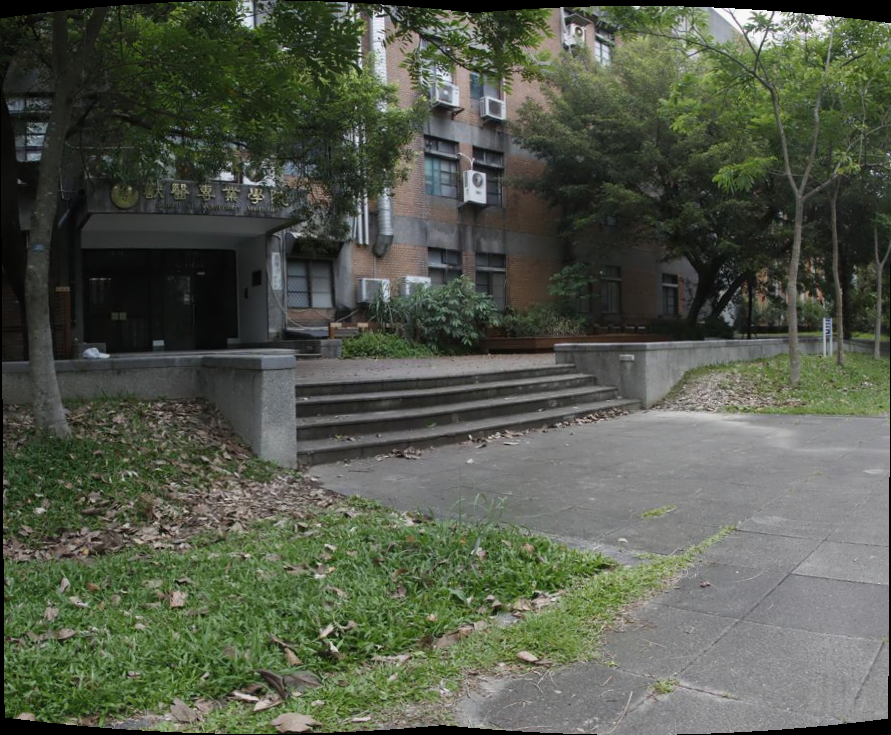

In [ ]:
from google.colab.patches import cv2_imshow

# Load images (ensure overlap and same scene)
imgs = [cv2.imread('/content/10.jpg'), cv2.imread('/content/11.jpg')]

stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(imgs)

if status == cv2.Stitcher_OK:
    # cv2.imshow('Panorama', stitched)
    cv2_imshow(stitched)

    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print("Error during stitching:", status)


In [ ]:
img1 = cv2.imread('/content/10.jpg', 0)
img2 = cv2.imread('/content/11.jpg', 0)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Ratio test
good = []
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

if len(good) > 8:
    pts1 = np.float32([kp1[m.queryIdx].pt for m in good])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good])

    F, _ = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
    E, _ = cv2.findEssentialMat(pts1, pts2, focal=1.0, pp=(0., 0.))
    _, R, t, _ = cv2.recoverPose(E, pts1, pts2)
    print("Rotation:\n", R)
    print("Translation:\n", t)
else:
    print("Not enough matches")


Rotation:
 [[ 9.72522427e-01 -2.32808250e-01 -6.69276501e-04]
 [ 2.32808320e-01  9.72522640e-01  2.71294201e-05]
 [ 6.44570597e-04 -1.82197107e-04  9.99999776e-01]]
Translation:
 [[-9.58166234e-01]
 [-2.86211590e-01]
 [-6.27706535e-04]]


# task 2

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# upload video file
from google.colab import files
uploaded = files.upload()

video_path = next(iter(uploaded))
cap = cv2.VideoCapture(video_path)


Saving test_07-03_mp4-5752729-uhd_3840_2160_30fps.mp4 (240p).mp4 to test_07-03_mp4-5752729-uhd_3840_2160_30fps.mp4 (240p).mp4


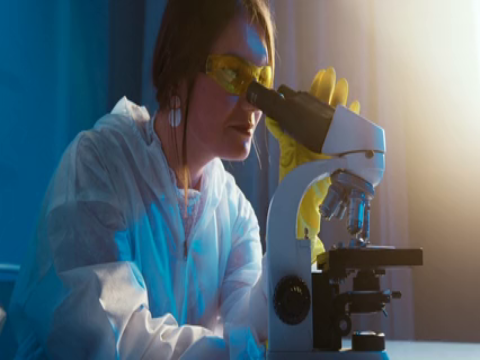

In [2]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    resized = cv2.resize(frame, (480, 360))
    cv2_imshow(resized)
    break  # Show only one frame for demo

cap.release()


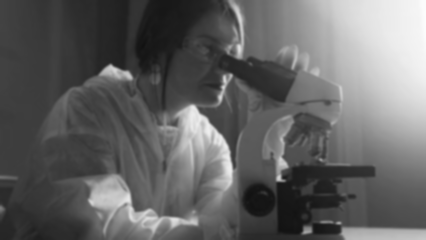

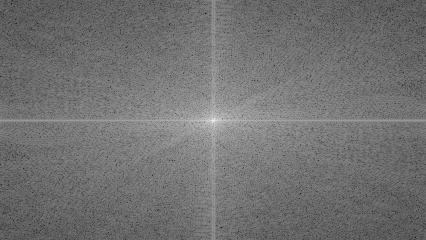

In [3]:
def process_spatial_frequency(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Spatial - Smoothing
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Frequency - FFT
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    cv2_imshow(blurred)
    cv2_imshow(np.uint8(magnitude_spectrum / np.max(magnitude_spectrum) * 255))

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    process_spatial_frequency(frame)
cap.release()


Frame: 0
Original Frame:


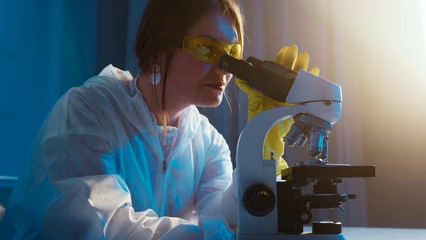

Foreground Mask:


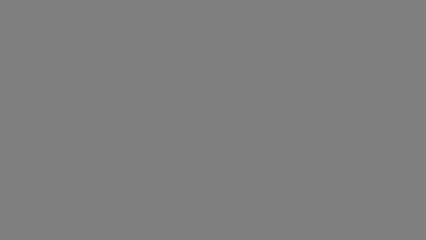

Frame: 10
Original Frame:


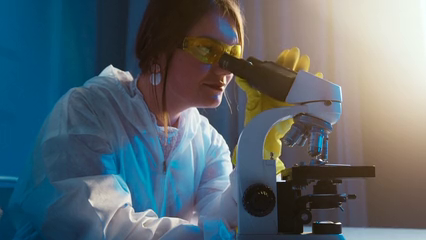

Foreground Mask:


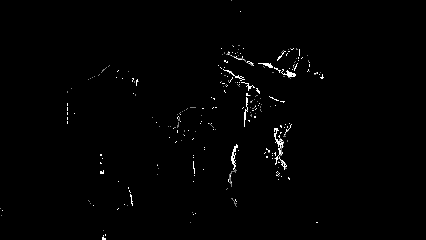

Frame: 20
Original Frame:


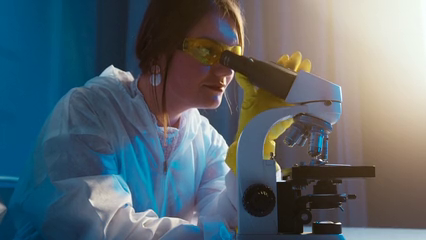

Foreground Mask:


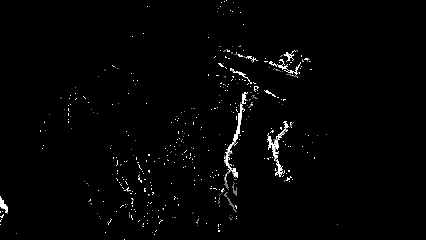

Frame: 30
Original Frame:


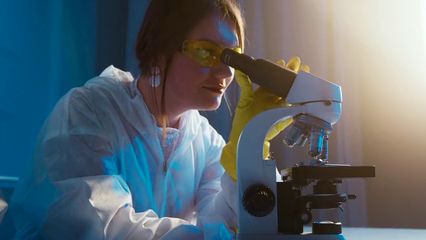

Foreground Mask:


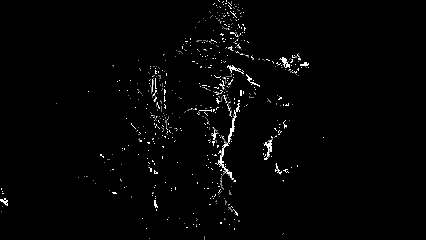

Frame: 40
Original Frame:


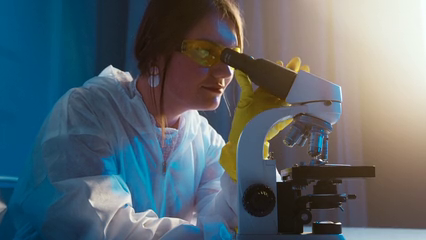

Foreground Mask:


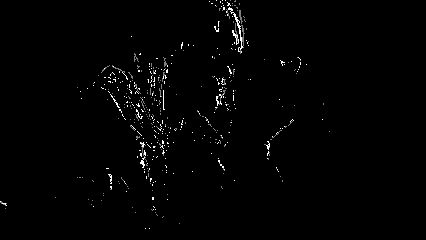

Frame: 50
Original Frame:


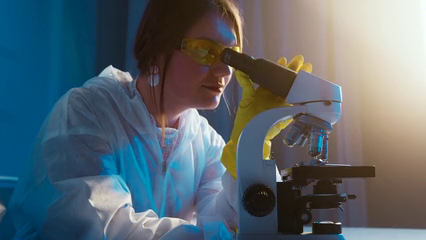

Foreground Mask:


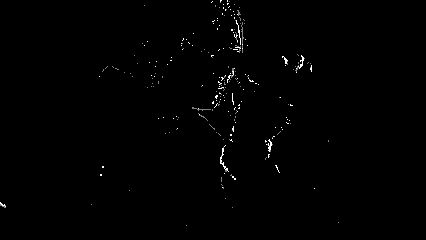

Frame: 60
Original Frame:


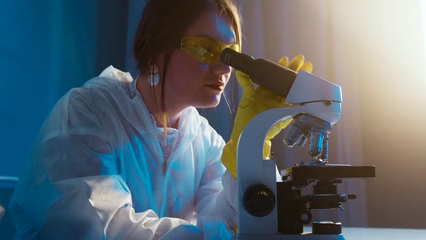

Foreground Mask:


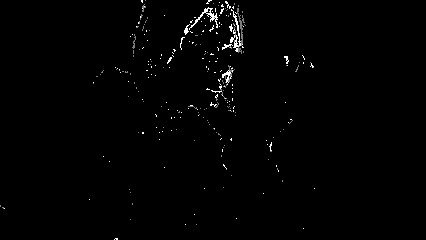

Frame: 70
Original Frame:


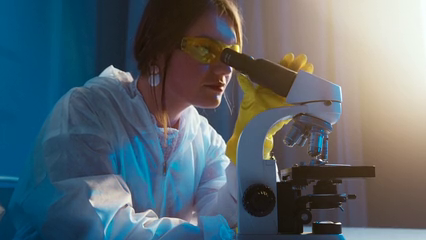

Foreground Mask:


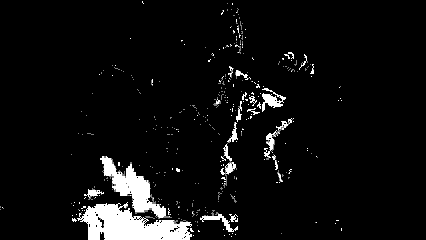

Frame: 80
Original Frame:


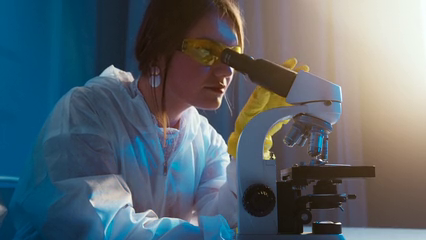

Foreground Mask:


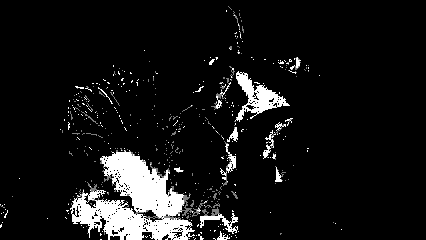

Frame: 90
Original Frame:


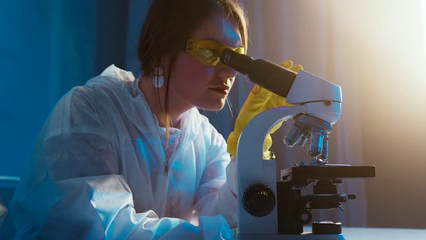

Foreground Mask:


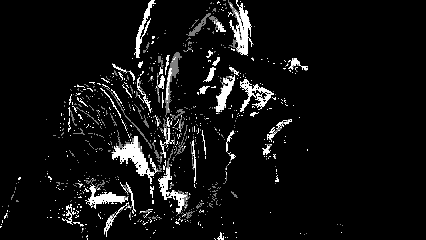

Frame: 100
Original Frame:


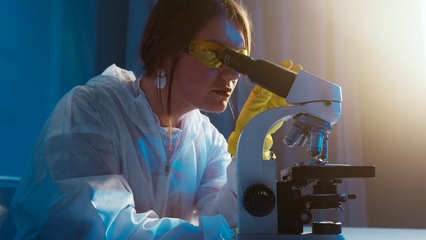

Foreground Mask:


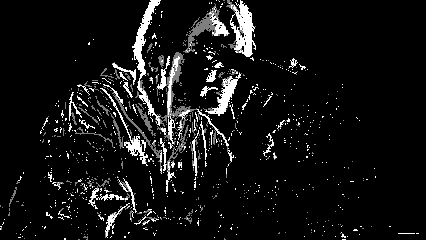

Frame: 110
Original Frame:


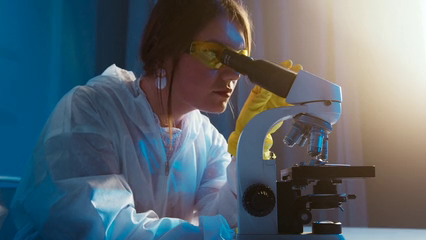

Foreground Mask:


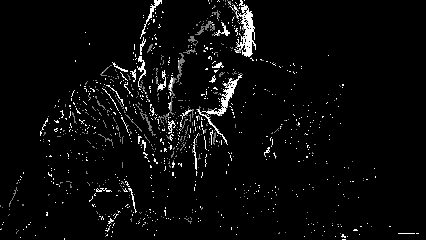

Frame: 120
Original Frame:


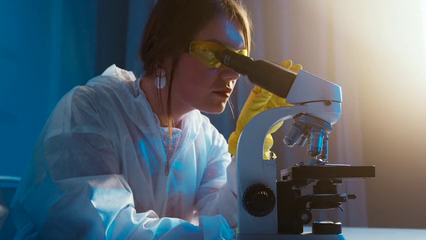

Foreground Mask:


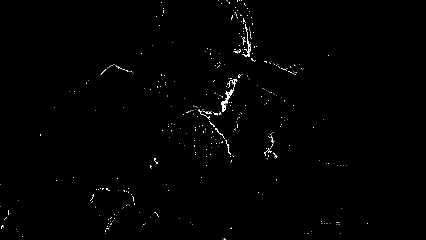

Frame: 130
Original Frame:


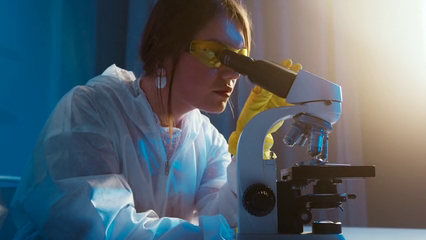

Foreground Mask:


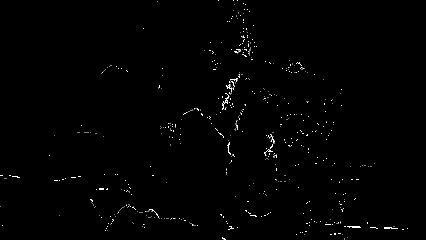

Frame: 140
Original Frame:


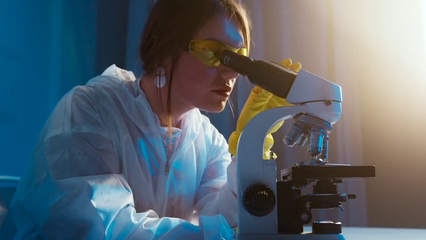

Foreground Mask:


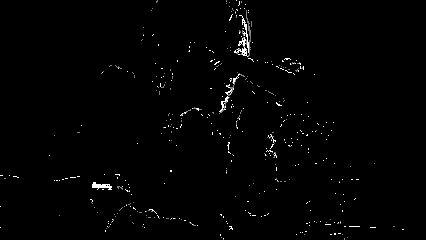

Frame: 150
Original Frame:


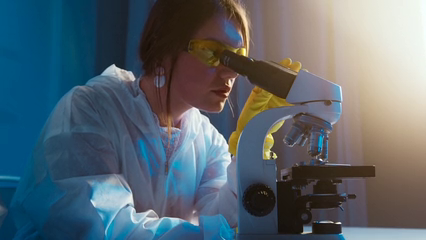

Foreground Mask:


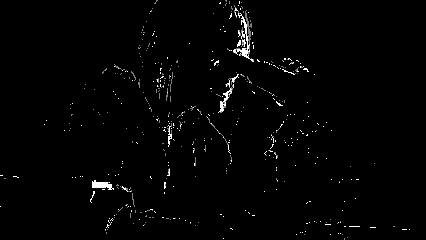

In [5]:
import cv2
from google.colab.patches import cv2_imshow

video_path = "/content/test_07-03_mp4-5752729-uhd_3840_2160_30fps.mp4 (240p).mp4"
cap = cv2.VideoCapture(video_path)

# Initialize background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

frame_count = 0
display_every = 10  # Only show every 10th frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_count > 150:  # Stop after 150 frames or end
        break

    # Apply foreground detection
    fgmask = fgbg.apply(frame)

    if frame_count % display_every == 0:
        print(f"Frame: {frame_count}")
        print("Original Frame:")
        cv2_imshow(frame)
        print("Foreground Mask:")
        cv2_imshow(fgmask)

    frame_count += 1

cap.release()


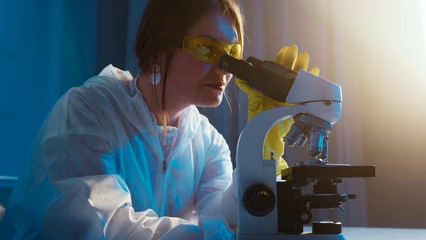

In [6]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)

    cv2_imshow(frame)
cap.release()
